In [1]:
full_range_lambda = [1.9, 5]

In [2]:
list_shutter_requested1 = [3.4738, 4.7358, 2.9055, 3.8283, 2.4112, 2.6781, 2.244]
list_shutter_requested1.sort()

In [3]:
list_shutter_requested2 = [4.0763, 4.904, 2.8755, 3.1457, 3.7431, 2.7501, 2.4566]
list_shutter_requested2.sort()

In [4]:
combine_list  = list_shutter_requested1 + list_shutter_requested2
combine_list.sort()

Conversion from lambda (requested) to equivalent TOF(s)

$$
\lambda = 0.3956.TOF_{micros}/L_{cm}
$$
$$
TOF_{micros}  = \lambda * L_{cm} / 0.3956
$$

In [13]:
detector_offset = 10000.0
distance_source_detector = 25   # m at VENUS

def from_lambda_to_tof(lambda_value):
    """
    Convert lambda to time of flight
    :param lambda_value: lambda in Angstrom
    :return: time of flight in microseconds
    """
    # Constants
    distance_source_detector = 25.0 * 100  # Distance from source to detector (cm)
    coeff = (distance_source_detector) / 0.3956
    tof = lambda_value * coeff - detector_offset
    return tof 



In [14]:
combine_list

[2.244,
 2.4112,
 2.4566,
 2.6781,
 2.7501,
 2.8755,
 2.9055,
 3.1457,
 3.4738,
 3.7431,
 3.8283,
 4.0763,
 4.7358,
 4.904]

In [15]:
import matplotlib.pyplot as plt
import numpy as np

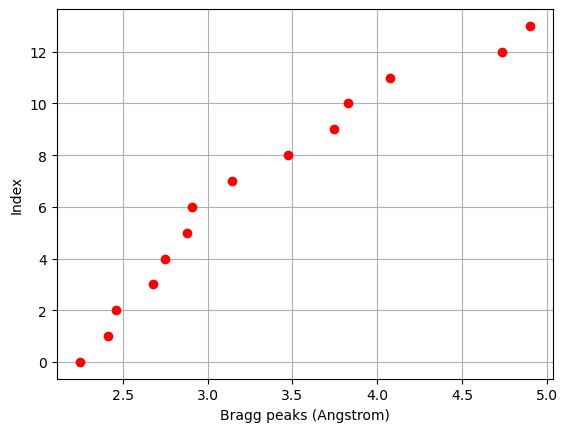

In [16]:
plt.figure()
plt.plot(combine_list, np.arange(len(combine_list)), 'ro', label='list_shutter_requested1')
plt.xlabel('Bragg peaks (Angstrom)')
plt.ylabel('Index')
plt.grid()

deadtime = 400microsecond (0.0633Angstroms)

Text(0.5, 0, 'TOF (microseconds)')

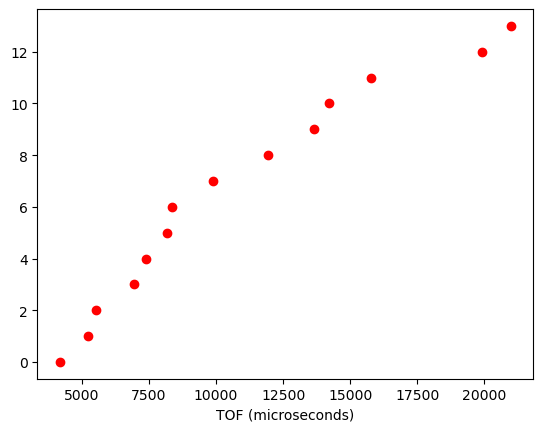

In [17]:
# plot in TOF scale this time
combine_list_tof = [from_lambda_to_tof(x) for x in combine_list]
plt.figure()
plt.plot(combine_list_tof, np.arange(len(combine_list)), 'ro', label='list_shutter_requested1')
plt.xlabel('TOF (microseconds)')

In [18]:
# highlight the largest 6 gaps and display mid value of the gap 

def find_largest_gaps(data):
    gap_list = np.diff(data)
    largest_gaps = sorted(gap_list, reverse=True)[:6]
    return largest_gaps


def calculate_mid_value(gap):
    return gap / 2


data = combine_list_tof
largest_gaps = find_largest_gaps(data)
mid_values = [calculate_mid_value(gap) for gap in largest_gaps]

data_lambda = combine_list
largest_gaps_lambda = find_largest_gaps(data_lambda)
mid_values_lambda = [calculate_mid_value(gap) for gap in largest_gaps_lambda]

In [19]:
largest_gaps_lambda

[0.6595000000000004,
 0.32810000000000006,
 0.2692999999999999,
 0.24799999999999978,
 0.2402000000000002,
 0.22150000000000025]

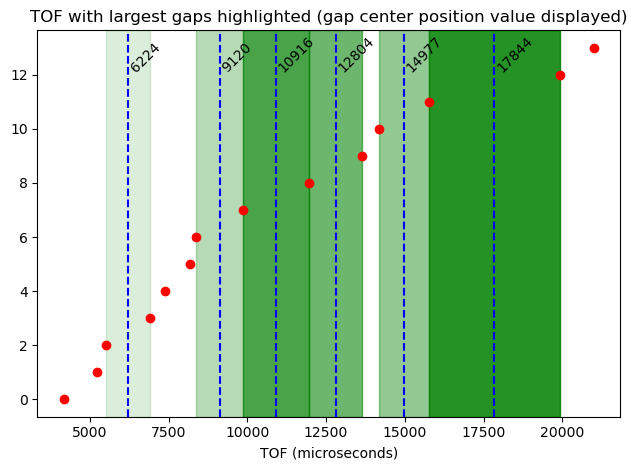

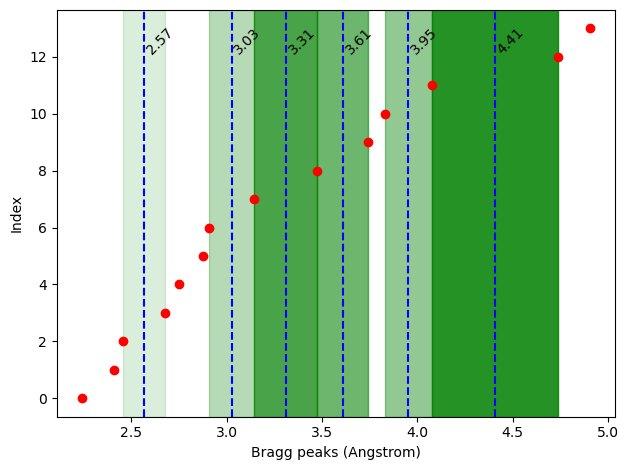

In [20]:
# plot in TOF scale this time

plt.figure()
plt.plot(combine_list_tof, np.arange(len(combine_list)), 'ro', label='list_shutter_requested1')
plt.xlabel('TOF (microseconds)')
plt.title('TOF with largest gaps highlighted (gap center position value displayed)')
plt.tight_layout()

for left_value, right_value in zip(combine_list_tof[:-1], combine_list_tof[1:]):
    gap_value = (right_value - left_value)
    if gap_value in largest_gaps:
        mid_value = calculate_mid_value(gap_value)
        plt.axvline(x=mid_value+left_value, color='b', linestyle='--', label='Mid value of gap')
        plt.text(mid_value+left_value, len(combine_list)-2, f'{mid_value+left_value:.0f}', rotation=45, verticalalignment='bottom')
        # plt.text(mid_value, 0, f'{mid_value:.2f}', rotation=90, verticalalignment='bottom')

        index = np.where(np.array(largest_gaps) == gap_value)[0][0]
        alpha_index = 1-(index+1)/(len(largest_gaps)+1)
        plt.axvspan(left_value, right_value, color='green', alpha=alpha_index, label='Gap area')

# do the same but in Angstrom scale
plt.figure()
plt.plot(combine_list, np.arange(len(combine_list)), 'ro', label='list_shutter_requested1')
plt.xlabel('Bragg peaks (Angstrom)')
plt.ylabel('Index')
plt.tight_layout()

for left_value, right_value in zip(combine_list[:-1], combine_list[1:]):
    gap_value = (right_value - left_value)
    if gap_value in largest_gaps_lambda:
        mid_value = calculate_mid_value(gap_value)
        plt.axvline(x=mid_value+left_value, color='b', linestyle='--', label='Mid value of gap')
        plt.text(mid_value+left_value, len(combine_list)-2, f'{mid_value+left_value:.2f}', rotation=45, verticalalignment='bottom')
        # plt.text(mid_value, 0, f'{mid_value:.2f}', rotation=90, verticalalignment='bottom')

        index = np.where(np.array(largest_gaps_lambda) == gap_value)[0][0]
        alpha_index = 1-(index+1)/(len(largest_gaps)+1)
        plt.axvspan(left_value, right_value, color='green', alpha=alpha_index, label='Gap area')


In [24]:
# add shutter_value_generator folder to python path
import sys
import os
sys.path.append(os.path.join('..', 'shutter_value_generator'))
from make_shutter_value_file import MakeShutterValueFile

In [27]:
o_shutter_value = MakeShutterValueFile(detector_sample_distance=25.0,
                                       detector_offset=detector_offset,
                                       output_folder=".",
                                       verbose=True,
                                       no_output_file=True,
                                       epics_chopper_wavelength_range=full_range_lambda,
                                       )

In [28]:
shutter_values = o_shutter_value.run(list_lambda_dead_time=[3.03, 3.95])

1e-06	0.008747964806036066	3	10.24
0.009547964806036065	0.014561868311499165	4	10.24
0.015361868311499164	0.0159	7	10.24


In [29]:
shutter_values

In [30]:
o_shutter_value.final_list_tof_frames

[[1e-06, 0.008747964806036066],
 [0.009547964806036065, 0.014561868311499165],
 [0.015361868311499164, 0.0159]]

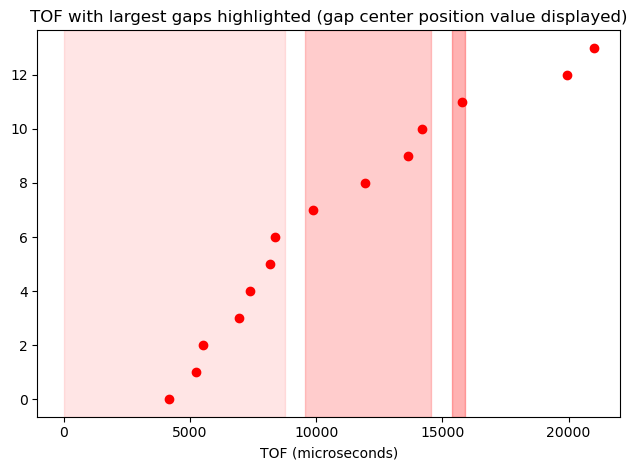

In [31]:
# plot in TOF scale this time

plt.figure()
plt.plot(combine_list_tof, np.arange(len(combine_list)), 'ro', label='list_shutter_requested1')
plt.xlabel('TOF (microseconds)')
plt.title('TOF with largest gaps highlighted (gap center position value displayed)')
plt.tight_layout()
# plt.xlim(min(combine_list_tof), max(combine_list_tof))

for left_value, right_value in zip(combine_list_tof[:-1], combine_list_tof[1:]):
    gap_value = (right_value - left_value)
    if gap_value in largest_gaps:
        mid_value = calculate_mid_value(gap_value)
        # plt.axvline(x=mid_value+left_value, color='b', linestyle='--', label='Mid value of gap')
        # plt.text(mid_value+left_value, len(combine_list)-2, f'{mid_value+left_value:.0f}', rotation=45, verticalalignment='bottom')
        # plt.text(mid_value, 0, f'{mid_value:.2f}', rotation=90, verticalalignment='bottom')

        # index = np.where(np.array(largest_gaps) == gap_value)[0][0]
        # alpha_index = 1-(index+1)/(len(largest_gaps)+1)
        # plt.axvspan(left_value, right_value, color='green', alpha=alpha_index, label='Gap area')

index = 0.1
for left_value, right_value in o_shutter_value.final_list_tof_frames:
    left_value_micros = left_value * 1e6
    right_value_micros = right_value * 1e6
    
    plt.axvspan(left_value_micros, right_value_micros, color='red', alpha=index, label='Shutter value')
    index += 0.1


In [ ]:
1/60